# A3: Visualization for Exploratory Data Analysis

* [Part 1: EDA](#Part-1.-EDA)
* [Part 2: Data Analysis](#Part-2:-Data-analysis-with-Matplotlib)
* [Submission](#Submission)
* [Lab environment](#Lab-environment-for-the-assignment)

## Objective

The main focus of [this course](https://courses.cs.sfu.ca/2021sp-cmpt-733-g1) is on data analytics. In fact, however, there are many other exciting topics about Big Data, which we cannot cover due to time constraints. [Lecture 3](https://sfu-db.github.io/bigdata-cmpt733/Lectures/lec3.pdf) gave you a brief overview of Visualization. Assignment 3 is designed to deepen your understanding. After completing this assignment, you should be able to answer the following questions:

1. How to perform visual data analysis using Python?
2. How to study the behaviour of a machine learning algorithm using visualization?

As a motivating example of how visualization can bring data to life and clear up misconceptions, consider to watch [Hans Rosling's famous TED talks](https://www.ted.com/playlists/474/the_best_hans_rosling_talks_yo), e.g. "The best stat's you've ever seen" from 2006.

## Part 1. EDA

**Real estate data**

Imagine you are data scientist working at a real-estate company. In this week, you job is to analyze the Vancouver's housing price. You first download a dataset from [property_tax_report_2020.zip](property_tax_report_2020.zip). The dataset contains information on properties from BC Assessment (BCA) and City sources in 2019.  You can find the schema information of the dataset from the [Vancouver Open Data Portal](https://opendata.vancouver.ca/explore/dataset/property-tax-report/information/).
Familiarize yourself with the context and background info on that page before diving deeper into Exploratory Data Analysis.

We first load the data as a DataFrame. To make this analysis more interesting, we will add two new columns to the data: `CURRENT_PRICE` represents the property price in 2020; `PREVIOUS_PRICE` represents the property price in 2019.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# use this in case you have a hidpi display and figures appear blurry
#%config InlineBackend.figure_format = 'retina'

# before running this, unzip the provided data
df = pd.read_csv("data/property_tax_report_2020.csv", sep=';')

df['CURRENT_PRICE'] = df.apply(lambda x: x['CURRENT_LAND_VALUE']+x['CURRENT_IMPROVEMENT_VALUE'], axis = 1)

df['PREVIOUS_PRICE'] = df.apply(lambda x: x['PREVIOUS_LAND_VALUE']+x['PREVIOUS_IMPROVEMENT_VALUE'], axis = 1)


Now let's start the EDA process. 

**Hint.** For some of the following questions, we provided an example plot (see [link](https://rawgit.com/sfu-db/bigdata-cmpt733/master/Assignments/A3/A3-plots.html)). But note that you do not have to use the same plot design. In fact, we didn't do a good job to follow the *Principles of Visualization Design* in the second half of the slides of [Lecture 3](https://sfu-db.github.io/bigdata-cmpt733/Lectures/lec3.pdf), please review this part by yourself.
You should think about how to correct the bad designs in my plots.

### Question 1. Look at some example rows
Print the first five rows of the data:

In [2]:
df.head()

,PID,LEGAL_TYPE,FOLIO,LAND_COORDINATE,ZONE_NAME,ZONE_CATEGORY,BLOCK,PLAN,DISTRICT_LOT,LOT,...,TAX_ASSESSMENT_YEAR,PREVIOUS_IMPROVEMENT_VALUE,PREVIOUS_LAND_VALUE,YEAR_BUILT,BIG_IMPROVEMENT_YEAR,TAX_LEVY,NEIGHBOURHOOD_CODE,REPORT_YEAR,CURRENT_PRICE,PREVIOUS_PRICE
0,023-408-472,STRATA,592134050035,59213405,CD-1 (316),Comprehensive Development,NaN,LMS2371,541,35,...,2020.0,62700.0,163000.0,1996.0,1996.0,1659.37,26,2020,249000.0,225700.0
1,018-909-728,STRATA,304716540103,30471654,CD-1 (222),Comprehensive Development,NaN,LMS1558,51,103,...,2020.0,162000.0,244000.0,1994.0,1994.0,1105.92,23,2020,378000.0,406000.0
2,005-099-234,LAND,823145430000,82314543,RS-1,One Family Dwelling,A,VAP2153,319,21,...,2020.0,258000.0,1735000.0,1995.0,1995.0,6796.80,12,2020,1725000.0,1993000.0
3,014-656-485,LAND,159694020000,15969402,RS-7,One Family Dwelling,558,VAP1417,472,A,...,2020.0,278000.0,1992000.0,1911.0,1995.0,8026.57,9,2020,2024000.0,2270000.0
4,027-759-482,STRATA,580172600006,58017260,HA-2,Historic Area,NaN,BCS3229,OGT,6,...,2020.0,142000.0,611000.0,2008.0,2008.0,2024.63,26,2020,684000.0,753000.0


### Question 2. Get summary statistics

From the above output, you will know that the data has 28 columns. Please use the describe() function to get the summary statistics of each column.

In [3]:
df.describe()

,FOLIO,LAND_COORDINATE,TO_CIVIC_NUMBER,CURRENT_LAND_VALUE,CURRENT_IMPROVEMENT_VALUE,TAX_ASSESSMENT_YEAR,PREVIOUS_IMPROVEMENT_VALUE,PREVIOUS_LAND_VALUE,YEAR_BUILT,BIG_IMPROVEMENT_YEAR,TAX_LEVY,NEIGHBOURHOOD_CODE,REPORT_YEAR,CURRENT_PRICE,PREVIOUS_PRICE
count,2.148030e+05,2.148030e+05,214247.000000,2.124600e+05,2.124600e+05,212460.0,2.093210e+05,2.093210e+05,207822.000000,207822.000000,2.126160e+05,214803.000000,214803.0,2.124600e+05,2.093210e+05
mean,4.989326e+11,4.989326e+07,2373.861800,1.642799e+06,4.132036e+05,2020.0,3.961172e+05,1.855741e+06,1983.320765,1990.903369,7.772672e+03,16.531524,2020.0,2.056003e+06,2.251858e+06
std,2.491233e+11,2.491233e+07,1982.937699,9.464673e+06,4.261610e+06,0.0,4.028677e+06,1.061024e+07,29.633127,19.498069,4.961722e+04,8.968396,0.0,1.171766e+07,1.259765e+07
min,1.963206e+10,1.963206e+06,1.000000,0.000000e+00,0.000000e+00,2020.0,0.000000e+00,0.000000e+00,1800.000000,200.000000,0.000000e+00,1.000000,2020.0,0.000000e+00,0.000000e+00
25%,2.107190e+11,2.107190e+07,939.000000,4.580000e+05,9.760000e+04,2020.0,9.570000e+04,5.040000e+05,1972.000000,1979.000000,1.869510e+03,9.000000,2020.0,6.400000e+05,6.900000e+05
50%,6.122717e+11,6.122717e+07,1776.000000,9.180000e+05,1.860000e+05,2020.0,1.850000e+05,1.044000e+06,1993.000000,1994.000000,3.847270e+03,16.000000,2020.0,1.116600e+06,1.252200e+06
75%,6.900304e+11,6.900304e+07,3331.000000,1.396000e+06,3.050000e+05,2020.0,2.980000e+05,1.610000e+06,2005.000000,2005.000000,6.322510e+03,25.000000,2020.0,1.694000e+06,1.896000e+06
max,8.453134e+11,8.453134e+07,9295.000000,2.759584e+09,6.934260e+08,2020.0,6.228440e+08,3.165054e+09,2019.000000,2019.000000,7.105463e+06,30.000000,2020.0,2.767385e+09,3.172855e+09


Please look at the above output carefully, and make sure that you understand the meanings of each row (e.g., std, 25% percentile).

### Question 3. Examine missing values

Now we are going to perform EDA on a single column (i.e., univariate analysis). We chose `YEAR_BUILT`, which represents in which year a property was built.  We first check whether the column has any missing value. 

In [4]:
# --- Write your code below ---
# Print the percentage of the rows whose YEAR_BUILT is missing.
missing_percentage = df['YEAR_BUILT'].isnull().sum() / len(df['YEAR_BUILT']) * 100
print("Missing Value: " + str(missing_percentage) + "%")

Missing Value: 3.249954609572492%


Missing values are very common in real-world datasets. In practice, you should always be aware of the impact of the missing values on your downstream analysis results.

### Question 4.  Plot a line chart

We now start investigating the values in the `YEAR_BUILT` column.  Suppose we want to know: "How many properties were built in each year (from 1990 to 2018)?" Please plot a line chart to answer the question.

Please write down the **two** most interesting findings that you draw from the plot. For example, you can say: <font color='blue'>"Vancouver has about 6300 properties built in 1996 alone, which is more than any other year"</font>.

**Findings**
1. Around 4000 properties were build in 1912 which is more than any year in the early 19's.
2. After the peak around 1912, the number of properties decreased dramatically and didn't recover until 1970.

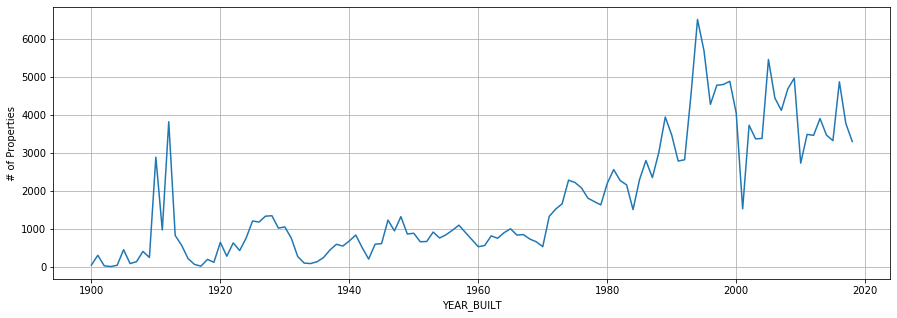

In [5]:
year_build_df = df.groupby(['YEAR_BUILT'], dropna=True).size().reset_index(name='# of Properties')
year_build_df = year_build_df.loc[(year_build_df["YEAR_BUILT"] >= 1900) & (year_build_df["YEAR_BUILT"] <= 2018)]
year_build_df

plt.figure(figsize=(15,5))
plt.grid()
sns.lineplot(data=year_build_df, x="YEAR_BUILT", y="# of Properties")
plt.show()

### Question 5. Plot a bar chart

Next, we want to find that, between 1900 and 2018, which years have the most number of properties been built? Plot a bar chart to show the top 20 years. 

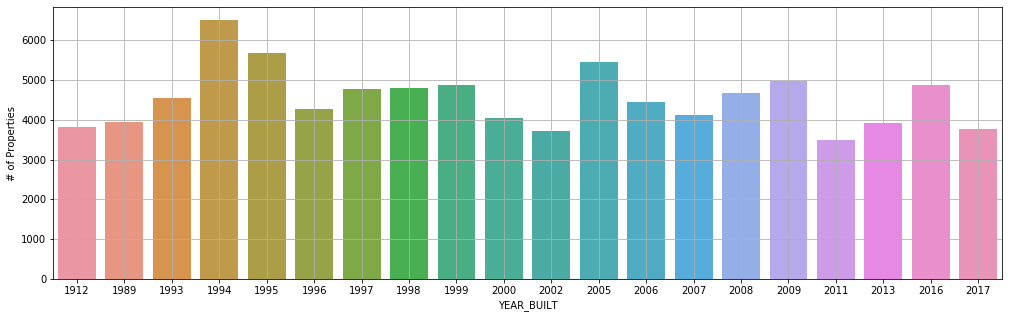

In [6]:
# --- Write your code below ---
sorted_df = year_build_df.sort_values(by=['# of Properties'], ascending = False)
sorted_df["YEAR_BUILT"] = sorted_df['YEAR_BUILT'].astype(int)
top_20 = sorted_df.head(20)
plt.figure(figsize=(17,5))
plt.xlabel('YEAR_BUILT', fontsize='medium')
plt.ylabel('# of Properties', fontsize='medium')
ax = sns.barplot(x="YEAR_BUILT", y="# of Properties", data=top_20)
ax.grid(True)

Please write down the **two** most interesting findings that you draw from the plot. 

**Findings**
1. 1994 has the most numer of properties built between 1900 and 2018.
2. I'm a litter shocked that the number of properties built in 2008 was actually increasing despite the financial crisis.

### Question 6. Plot a histogram

What's the distribution of the number of properties built between 1990 and 2018? Please plot a histogram to answer this question.

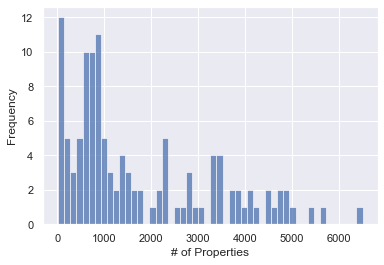

In [7]:
sns.set_theme()
sns.histplot(data=year_build_df, x="# of Properties", bins=50)
plt.ylabel("Frequency")
plt.show()

Please write down the **two** most interesting findings that you draw from the plot. 

**Findings**
1. The distribution looks like Chi-Square.
2. The number of properties from 0 to 1000 have the most frequency. 

### Question 7. Make a scatter plot

Suppose we are interested in those years which built more than 2000 properties. Make a scatter plot to examine whether there is a relationship between the number of built properties and the year?

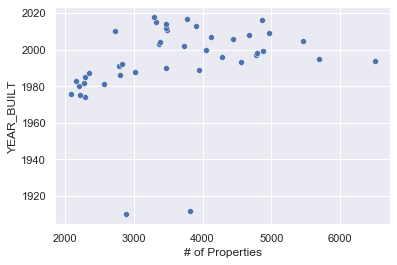

In [8]:
year_df = df.groupby(['YEAR_BUILT'], dropna=True).size().reset_index(name='# of Properties')
more_than_2000 = year_df.loc[year_df['# of Properties'] > 2000]
sns.scatterplot(data=more_than_2000, x="# of Properties", y="YEAR_BUILT")

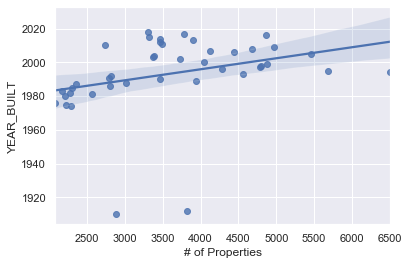

In [9]:
sns.regplot(x="# of Properties", y="YEAR_BUILT", data=more_than_2000);

Please write down the **two** most interesting findings that you draw from the plot. 

**Findings**
1. Most of properties were built after 1980
2. If we fit a regerssion line to our data, as we can see there is a linear relationship between the number of properties and year built. However, outliers do exist.

### Step 8. Obtain geographic coordinates for Canadian postal codes

The property data carries Canadian postal codes, but latitude/longitude coordinates would be much more useful. Unfortunately, geolocations of Canadian postal codes are protected by copyright and the information has to be purchased. Fortunately, you already paid for it with your tuition...

Statistics Canada has a protected dataset, the postal code conversion file, which is available to SFU students via the Abacus Dataverse. Please follow these steps:
* Have a valid SFU account (not sure if alumni account would work)
* Connect to the Abacus Data Network via https://databases.lib.sfu.ca/record/61245148090003610/Abacus-Data-Network
* Connecting via the above link should show you as logged in user at https://abacus-library-ubc-ca.proxy.lib.sfu.ca/
* Search for: **Postal Code Conversion File 2020**
* Download files: **pccfNat_fccpNat_082020.txt** and the [2020 PCCF Guide .pdf](https://abacus-library-ubc-ca.proxy.lib.sfu.ca/file.xhtml?persistentId=hdl:11272.1/AB2/KBP0AM/6YEABK) and place them in the same folder as this notebook.

#### Details about the dataset in the 2020 PCCF Guide
* Description of available fields for each postal code, see Content section, pp. 9
* Offsets and Size of fields to extract from lines in Postal Code Conversion File, Table 4.1, p. 11.  
  This is also included along with this notebook as **pccf_record_layout.csv**

In [8]:
rldf = pd.read_csv('pccf_2020_record_layout.csv')
# load the raw text pccf file
with open('pccfNat_fccpNat_082020.txt','r', encoding='latin-1') as fh:
    pctxt = fh.read()
pclines = pctxt.split('\n')
pclines = list(filter(lambda l: len(l), pclines)) # keep only non-empty lines
len(pclines)
# 1731989
pclines[1]

'A0A1B0A0A1010011001464Avondale                                                              T  47299649910.001099101000100009100105620003  47.400311   -53.22148513AVONDALE                      WW19830401190000012NNN40'

The following extraction of substrings works, but is *very slow*. Please use [pandas string methods](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#string-methods) to make this faster.  
**TODO** write your improved code here.

In [ ]:
# TODO: rewrite this function to make it run in about a minute (or justmaybe 17 sec)
def gen_pccf():
    def row_slice():
        for l in pclines:
            yield l[r['Position']-1:r['Position']+r['Size']-1]
    for idx, r in rldf.iterrows():
        print(idx, r['Field name'])
        yield r['Field name'], list(row_slice())
pccf_df = pd.DataFrame(dict(gen_pccf()))

In [7]:
test = pd.Series(pclines)
test

0          A0A1A0A0A1010011001144Aquaforte               ...
1          A0A1B0A0A1010011001464Avondale                ...
2          A0A1C0A0A1010011001557Bay Bulls               ...
3          A0A1C0A0A1010011001557Bay Bulls               ...
4          A0A1C0A0A1010011001557Bay Bulls               ...
                                 ...                        
1731984    Y0B1Y0Y0B6060016001058Marsh Lake              ...
1731985    Y1A0H7Y1A6060016001009Whitehorse              ...
1731986    Y1A0L8Y1A6060016001009Whitehorse              ...
1731987    Y1A0M3Y1A6060016001009Whitehorse              ...
1731988    Y1A0P1Y1A6060016001009Whitehorse              ...
Length: 1731989, dtype: object

In [12]:
def gen_pccf():
    def row_slice():
        records = test.str.slice(start=r['Position']-1, stop=r['Position']+r['Size']-1)
        for record in records:
            yield record
    for idx, r in rldf.iterrows():
#         print(idx, r['Field name'])
        yield r['Field name'], list(row_slice())
pccf_df = pd.DataFrame(dict(gen_pccf()))

In [13]:
pccf_df

,Postal code,FSA,PR,CDuid,CSDuid,CSDname,CSDtype,CCScode,SAC,SACtype,...,PCtype,Comm_Name,DMT,H_DMT,Birth_Date,Ret_Date,PO,QI,Source,POP_CNTR_RA_SIZE_CLASS
0,A0A1A0,A0A,10,1001,1001144,Aquaforte ...,T,214,999,7,...,5,AQUAFORTE,W,W,19830801,19000001,2,NNN,4,0
1,A0A1B0,A0A,10,1001,1001464,Avondale ...,T,472,996,4,...,3,AVONDALE,W,W,19830401,19000001,2,NNN,4,0
2,A0A1C0,A0A,10,1001,1001557,Bay Bulls ...,T,519,001,1,...,3,BAY BULLS,W,W,19830401,19000001,1,NNN,4,1
3,A0A1C0,A0A,10,1001,1001557,Bay Bulls ...,T,519,001,1,...,3,BAY BULLS,W,W,19830401,19000001,1,NNN,4,1
4,A0A1C0,A0A,10,1001,1001557,Bay Bulls ...,T,519,001,1,...,4,BAY BULLS,W,W,19830401,19000001,2,NNN,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731984,Y0B1Y0,Y0B,60,6001,6001058,Marsh Lake ...,NO,045,990,,...,4,MARSH LAKE,W,W,20130301,19000001,2,NNN,4,
1731985,Y1A0H7,Y1A,60,6001,6001009,Whitehorse ...,CY,045,990,,...,1,WHITEHORSE,A,A,20130301,19000001,0,NNN,4,
1731986,Y1A0L8,Y1A,60,6001,6001009,Whitehorse ...,CY,045,990,,...,1,WHITEHORSE,A,A,20130901,19000001,0,NNN,4,
1731987,Y1A0M3,Y1A,60,6001,6001009,Whitehorse ...,CY,045,990,,...,1,WHITEHORSE,A,A,20140701,19000001,0,NNN,4,


In [14]:
pccf_df['LAT'] = pccf_df['LAT'].astype(float)
pccf_df['LONG'] = pccf_df['LONG'].astype(float)
pccf_short = pccf_df[['Postal code', 'LONG', 'LAT', 'CSDname']]
pccf_short = pccf_short.groupby('Postal code').agg({'LONG':'mean','LAT':'mean','CSDname':'first'})

Phew, that was tedious! But now we're ready to merge geolocation to our property data.

In [15]:
df['Postal code'] = df['PROPERTY_POSTAL_CODE'].str.replace(' ','')
dfgeo = df.merge(pccf_short, on='Postal code')

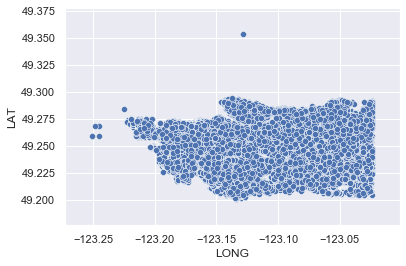

In [16]:
sns.scatterplot(data=dfgeo, x="LONG", y="LAT")
plt.show()

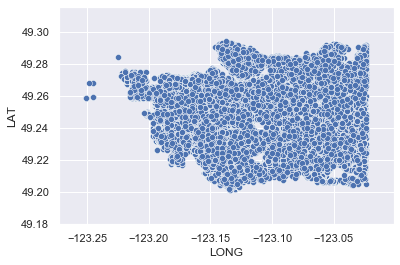

In [20]:
# As we can see from the above scatter plot, we should remove latitude greater than 49.35
dfgeo_van = dfgeo.loc[(dfgeo["LAT"] < 49.35)]
sns.scatterplot(data=dfgeo_van, x="LONG", y="LAT")
plt.show()

Feel free to use the function below to prepare a heatmap of averages. The code is based on [Matthew McGonagle's blog post](https://matthewmcgonagle.github.io/blog/2019/01/22/HeatmapBins).

In [18]:
def heatmap_bins(data, fieldsxy, ncuts=30, aggarg='mean'):
    """Perform data.groupby using bin cuts along columns named in fieldsxy.
    Args:
        data     - pandas dataframe
        fieldsxy - list of column names along which to perform binned groupby
        ncuts    - number of cuts to perform for each field (see pd.cut)
        aggarg   - aggregation operation to perform, default: 'mean'
    Returns:
        grouped dataframe, ready for plotting via sns.heatmap(means['COLUMNAME'])
    """
    # based on: https://matthewmcgonagle.github.io/blog/2019/01/22/HeatmapBins
    cuts = pd.DataFrame({str(feature) + ' bins' : pd.cut(data[feature], ncuts) for feature in fieldsxy})
    means = data.join(cuts).groupby( list(cuts) ).agg(aggarg)
    means = means.unstack(level = 0) # Use level 0 to put 0Bin as columns.
    # Reverse the order of the rows as the heatmap will print from top to bottom.
    means = means.iloc[::-1]
    return means

**TODO** plot a heatmap of average current property prices, within the same geographic area

Note that the colormap is pretty much useless due to a few extreme values. Rather than removing them as 'outliers', please just map the values before drawing with a suitable choice of logarithm.

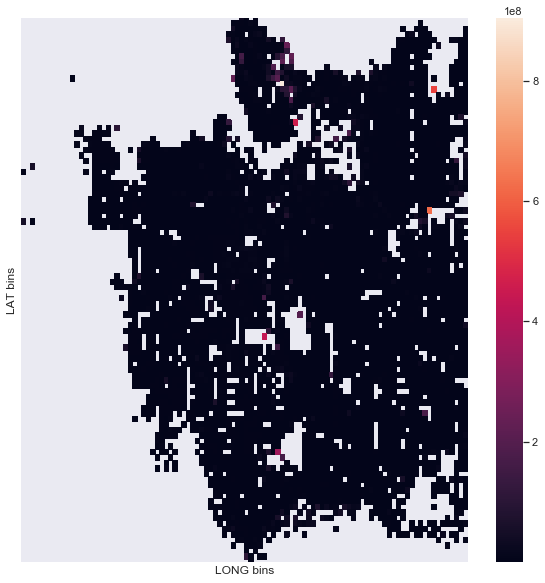

In [19]:
field = 'CURRENT_PRICE'
means = heatmap_bins(dfgeo_van, ["LONG", "LAT"], ncuts=100)
with plt.rc_context({'figure.figsize': (10,10)}):
    sns.heatmap(means[field])
plt.xticks([], []);
plt.yticks([], []);

Please write down the **two** most interesting findings that you draw from the plot. 

**Findings**
1. Properties price are higher in North Vancouver compare to South. 
2. Some high value properties are located in North East.

If you are seeking further challenges, consider to combine the property data with elevation information as detailed below. There are no additional points for this, but it should allow to gain even further insight into factors related to property pricing.